<a href="https://colab.research.google.com/github/girishmishra91/Sugercane-Production/blob/main/Review_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/List of Countries by Sugarcane Production.csv')

# Preview the first 5 rows
print(df.head())

   Unnamed: 0   Country      Continent Production (Tons)  \
0           0    Brazil  South America       768.678.382   
1           1     India           Asia       348.448.000   
2           2     China           Asia       123.059.739   
3           3  Thailand           Asia        87.468.496   
4           4  Pakistan           Asia        65.450.704   

  Production per Person (Kg) Acreage (Hectare) Yield (Kg / Hectare)  
0                  3.668,531        10.226.205             75.167,5  
1                     260721         4.950.000             70.393,5  
2                      88287         1.675.215             73.459,1  
3                  1.264,303         1.336.575             65.442,2  
4                     324219         1.130.820               57.879  


# Selection of appropriate chart types for insights

1. Top Producers — Bar Chart

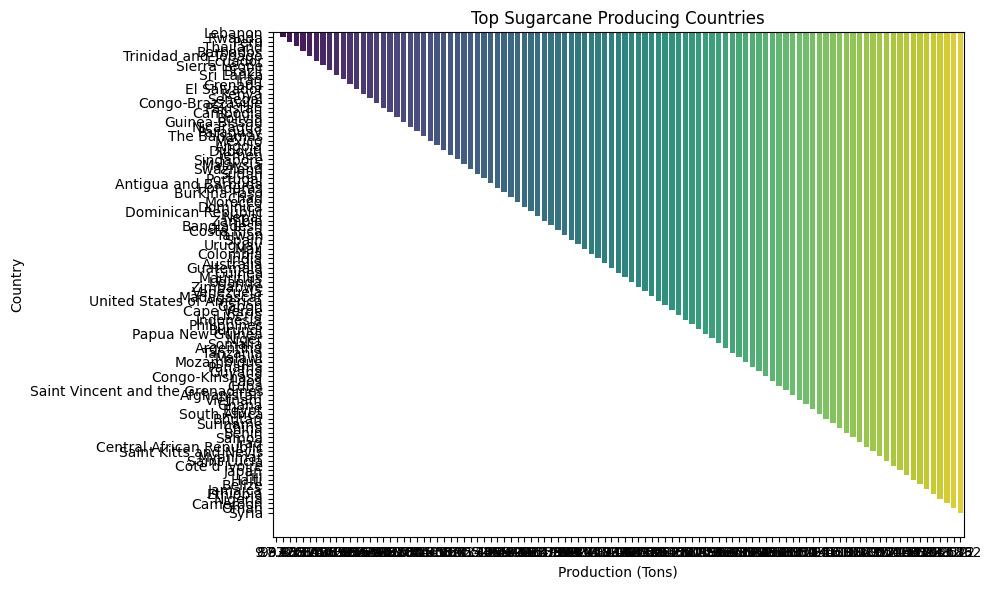

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Production (Tons)', y='Country', data=df.sort_values('Production (Tons)', ascending=False), palette='viridis')
plt.title('Top Sugarcane Producing Countries')
plt.xlabel('Production (Tons)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


2. Production by Continent — Pie Chart

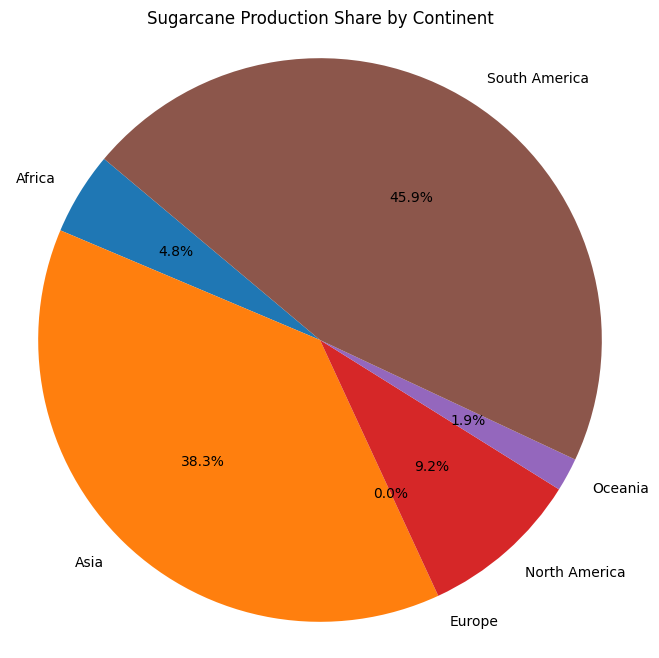

In [ ]:
# Clean numeric columns (remove . and , then convert to float)
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.', '', regex=False).str.replace(',', '', regex=False)
df['Production (Tons)'] = df['Production (Tons)'].astype(float)

# Group by Continent
continent_data = df.groupby('Continent')['Production (Tons)'].sum().reset_index()

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(continent_data['Production (Tons)'],
        labels=continent_data['Continent'],
        autopct='%1.1f%%',
        startangle=140)
plt.title('Sugarcane Production Share by Continent')
plt.axis('equal')
plt.show()

 3. Yield vs. Acreage — Scatter Plot

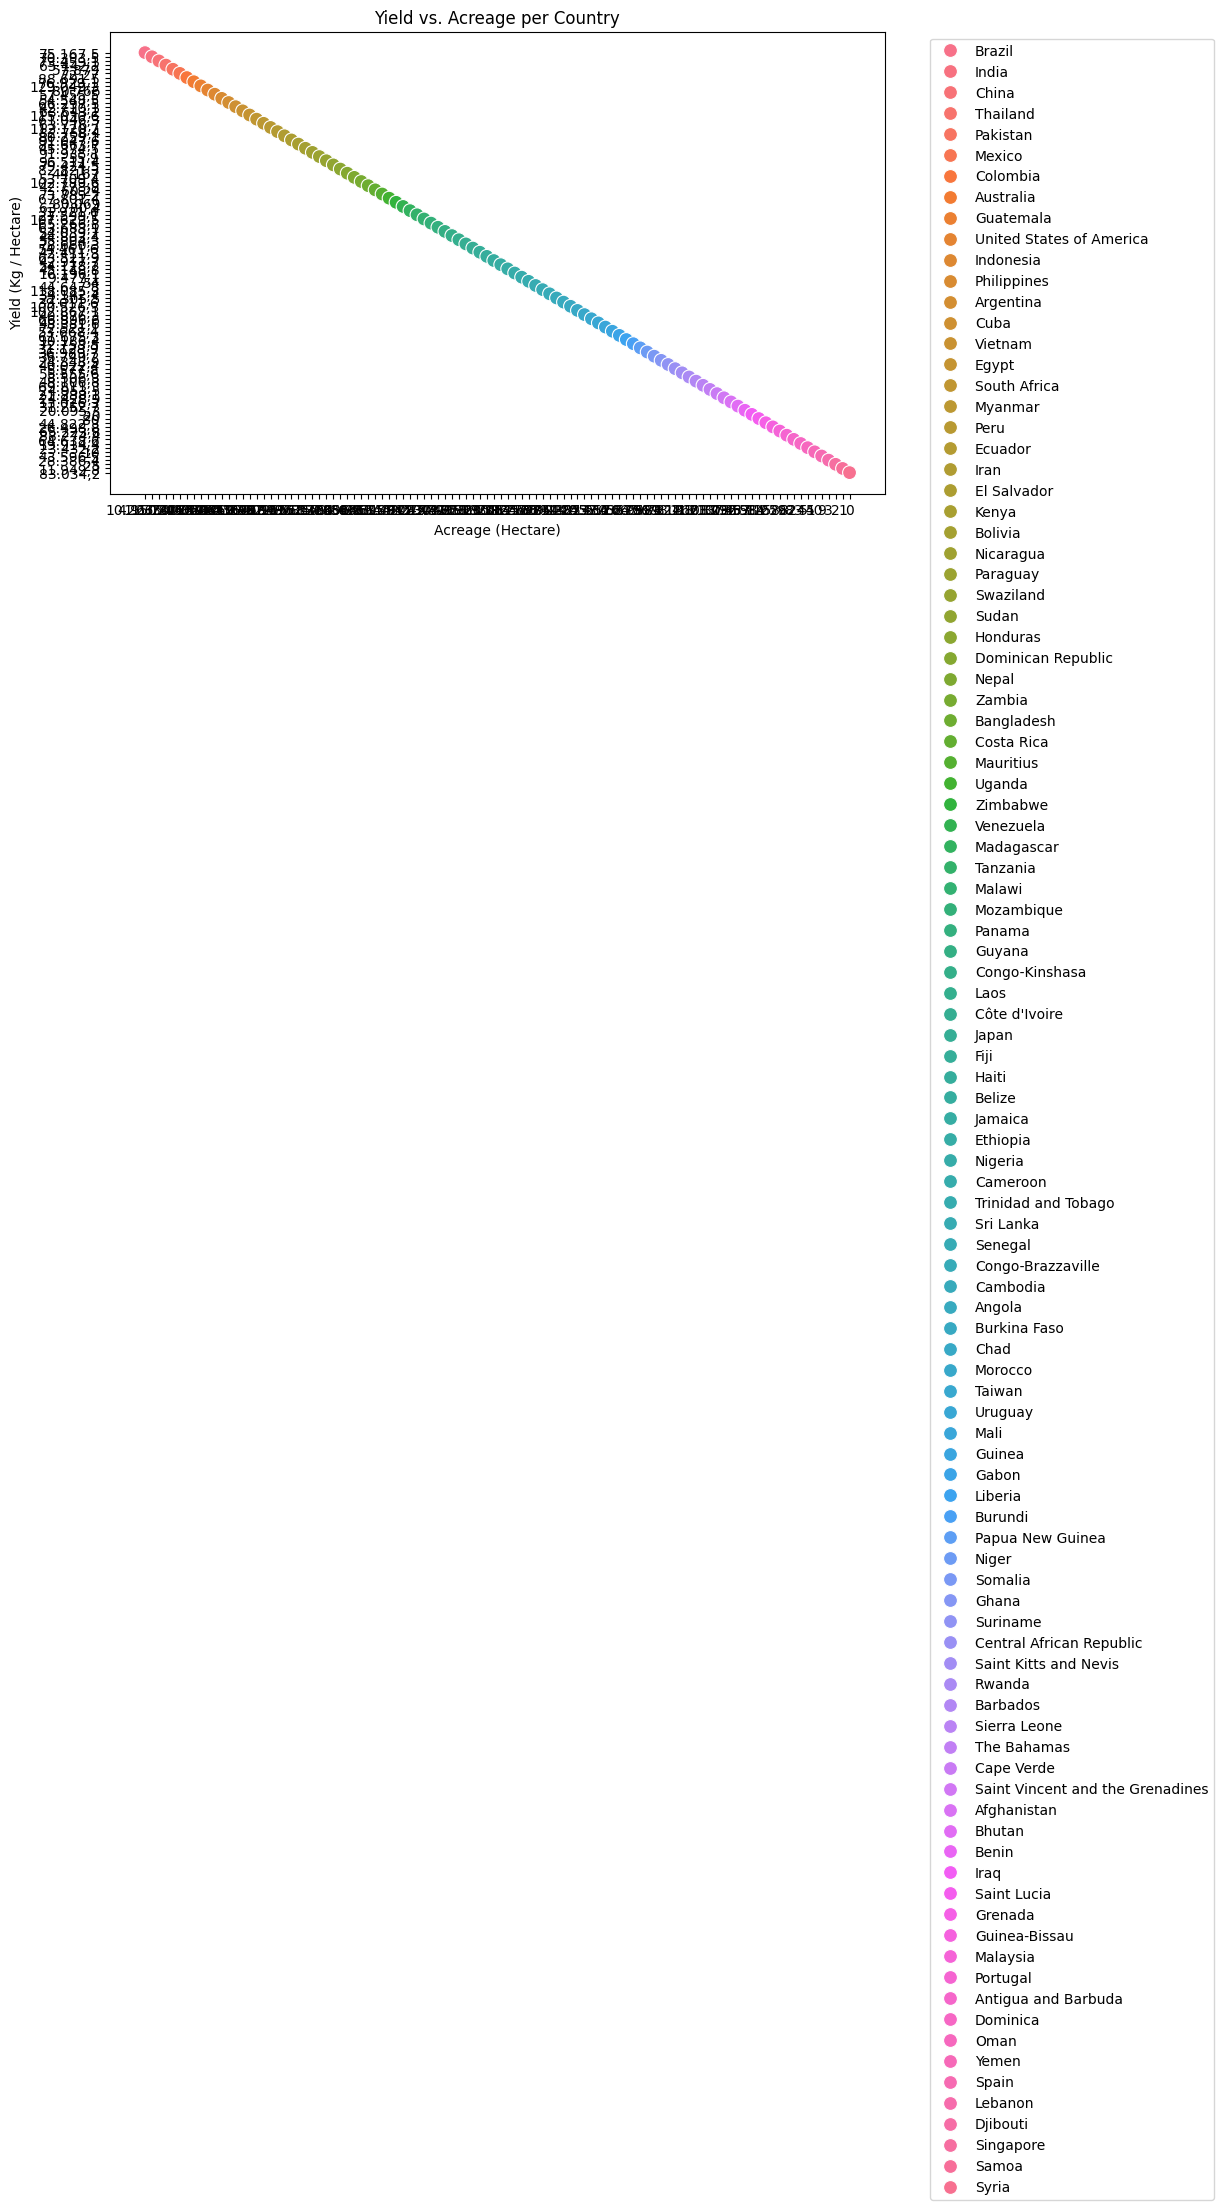

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Acreage (Hectare)', y='Yield (Kg / Hectare)', hue='Country', data=df, s=100)
plt.title('Yield vs. Acreage per Country')
plt.xlabel('Acreage (Hectare)')
plt.ylabel('Yield (Kg / Hectare)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


 5. Country-wise Yield Comparison — Horizontal Bar Chart

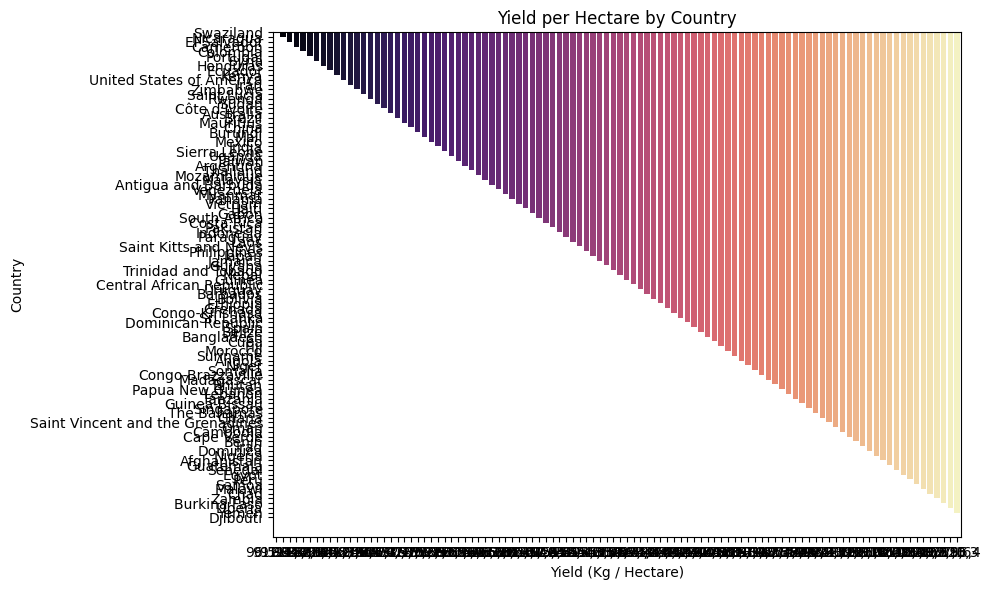

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(y='Country', x='Yield (Kg / Hectare)', data=df.sort_values('Yield (Kg / Hectare)', ascending=False), palette='magma')
plt.title('Yield per Hectare by Country')
plt.xlabel('Yield (Kg / Hectare)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


# Aesthetics and clarity of visualizations

Aesthetic Bar Chart (Seaborn)

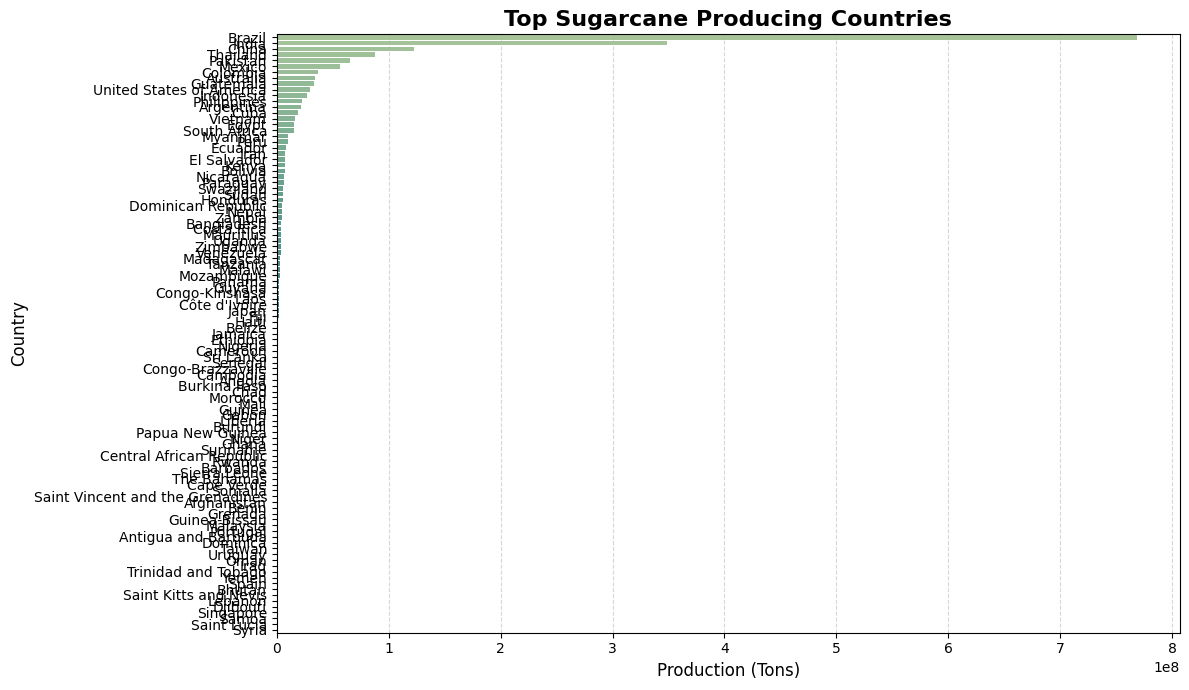

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort data for better visual
top_producers = df.sort_values('Production (Tons)', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(data=top_producers, x='Production (Tons)', y='Country', palette='crest')

plt.title('Top Sugarcane Producing Countries', fontsize=16, fontweight='bold')
plt.xlabel('Production (Tons)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Aesthetic Pie Chart (Matplotlib)

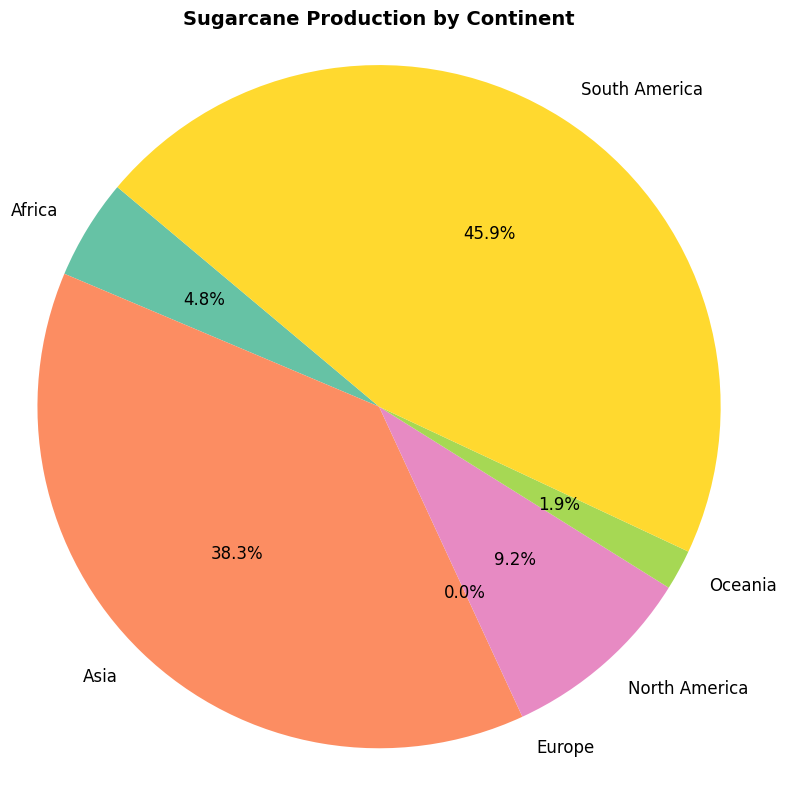

In [ ]:
continent_data = df.groupby('Continent')['Production (Tons)'].sum().reset_index()

colors = sns.color_palette('Set2')
plt.figure(figsize=(8, 8))
plt.pie(continent_data['Production (Tons)'],
        labels=continent_data['Continent'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 12})

plt.title('Sugarcane Production by Continent', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


Aesthetic Bubble Chart (Plotly)

In [ ]:
def clean_column(col):
    return df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '', regex=False).replace('', '0').astype(float)

df['Production (Tons)'] = clean_column('Production (Tons)')
df['Production per Person (Kg)'] = clean_column('Production per Person (Kg)')
df['Acreage (Hectare)'] = clean_column('Acreage (Hectare)')
df['Yield (Kg / Hectare)'] = clean_column('Yield (Kg / Hectare)')

# Step 3: Remove rows with missing or zero data in plot columns
df.dropna(subset=['Yield (Kg / Hectare)', 'Production (Tons)', 'Acreage (Hectare)'], inplace=True)
df = df[df['Acreage (Hectare)'] > 0]  # Optional: remove zero-size markers

# Step 4: Plot
fig = px.scatter(
    df,
    x='Yield (Kg / Hectare)',
    y='Production (Tons)',
    size='Acreage (Hectare)',
    color='Continent',
    hover_name='Country',
    size_max=60,
    template='plotly_white',
    title='Sugarcane Production vs Yield (Interactive Bubble Chart)'
)

fig.update_traces(marker=dict(opacity=0.8, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(title_font_size=18, font=dict(size=12))
fig.show()

# Interactive elements

 Simple Dropdown Example (using Plotly Express)

In [ ]:
import plotly.express as px

fig = px.scatter(df,
                 x='Yield (Kg / Hectare)',
                 y='Production (Tons)',
                 size='Acreage (Hectare)',
                 color='Continent',
                 hover_name='Country',
                 size_max=60,
                 template='plotly_white',
                 title='Sugarcane Production vs Yield by Continent')

fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color='black')))
fig.update_layout(title_font_size=18)

# Optional: add continent filtering dropdown
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {"label": cont,
                 "method": "update",
                 "args": [{"visible": [c == cont for c in df['Continent']]},
                          {"title": f"Sugarcane Production for {cont}"}]}
                for cont in df['Continent'].unique()
            ] + [
                {"label": "All", "method": "update", "args": [{"visible": [True]*len(df)},
                                                               {"title": "Sugarcane Production by Continent"}]}
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)

fig.show()


 Interpretation for Sugarcane Production

## 📘 Interpretation and Storytelling with Data
The visualizations reveal that Brazil is by far the leading sugarcane producer globally, contributing over 768 million tons, followed by India and China. These top producers are all located in regions with tropical or subtropical climates, which support sugarcane growth.

While Brazil has the highest overall production, Thailand stands out with a higher production per person and efficient yield per hectare, indicating better land use. Conversely, Pakistan, despite significant acreage, has comparatively lower yield, possibly due to agricultural practices or water availability.

The bubble chart shows that countries with high yield and large acreage tend to dominate total production. Countries with smaller land (like Thailand) still achieve strong results through better productivity per hectare, showing the importance of farming efficiency.

The continent-wise pie chart shows that Asia dominates global sugarcane production, accounting for a major share, thanks to contributions from India, China, Thailand, and Pakistan. This aligns with the region’s climate, large agricultural workforce, and demand for sugar-based products.

In summary, the data suggests that both geographic suitability and agricultural efficiency are key drivers of high sugarcane output. Future improvements in technology and resource management could help low-yield countries boost production sustainably.




